<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorialAbel/blob/main/Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
#a list of of our images
list_of_imgs = ["Copy of boat1.jpg", "Copy of boat2.jpg", "Copy of boat3.jpg", "Copy of boat4.jpg", "Copy of boat5.jpg", "Copy of boat6.jpg"]

In [8]:
images = []
for img in list_of_imgs:
  image = cv2.imread(f"/content/drive/MyDrive/AbelFolder/boat/{img}")
  images.append(image)
len(images)
print(images)

[array([[[175, 176, 186],
        [176, 177, 187],
        [178, 179, 189],
        ...,
        [199, 186, 184],
        [198, 185, 183],
        [197, 185, 181]],

       [[177, 178, 188],
        [178, 179, 189],
        [180, 181, 191],
        ...,
        [193, 179, 173],
        [193, 177, 170],
        [191, 175, 168]],

       [[179, 180, 190],
        [180, 181, 191],
        [181, 182, 192],
        ...,
        [190, 171, 158],
        [187, 168, 153],
        [186, 167, 152]],

       ...,

       [[ 62,  64,  75],
        [ 49,  51,  61],
        [ 41,  43,  53],
        ...,
        [ 76,  71,  70],
        [ 71,  63,  63],
        [ 70,  62,  62]],

       [[ 32,  34,  45],
        [ 33,  35,  45],
        [ 36,  38,  48],
        ...,
        [ 82,  73,  69],
        [ 90,  81,  77],
        [ 99,  90,  86]],

       [[ 52,  54,  65],
        [ 52,  54,  64],
        [ 52,  54,  64],
        ...,
        [ 86,  81,  80],
        [ 85,  80,  81],
        [ 86,  84,  84]

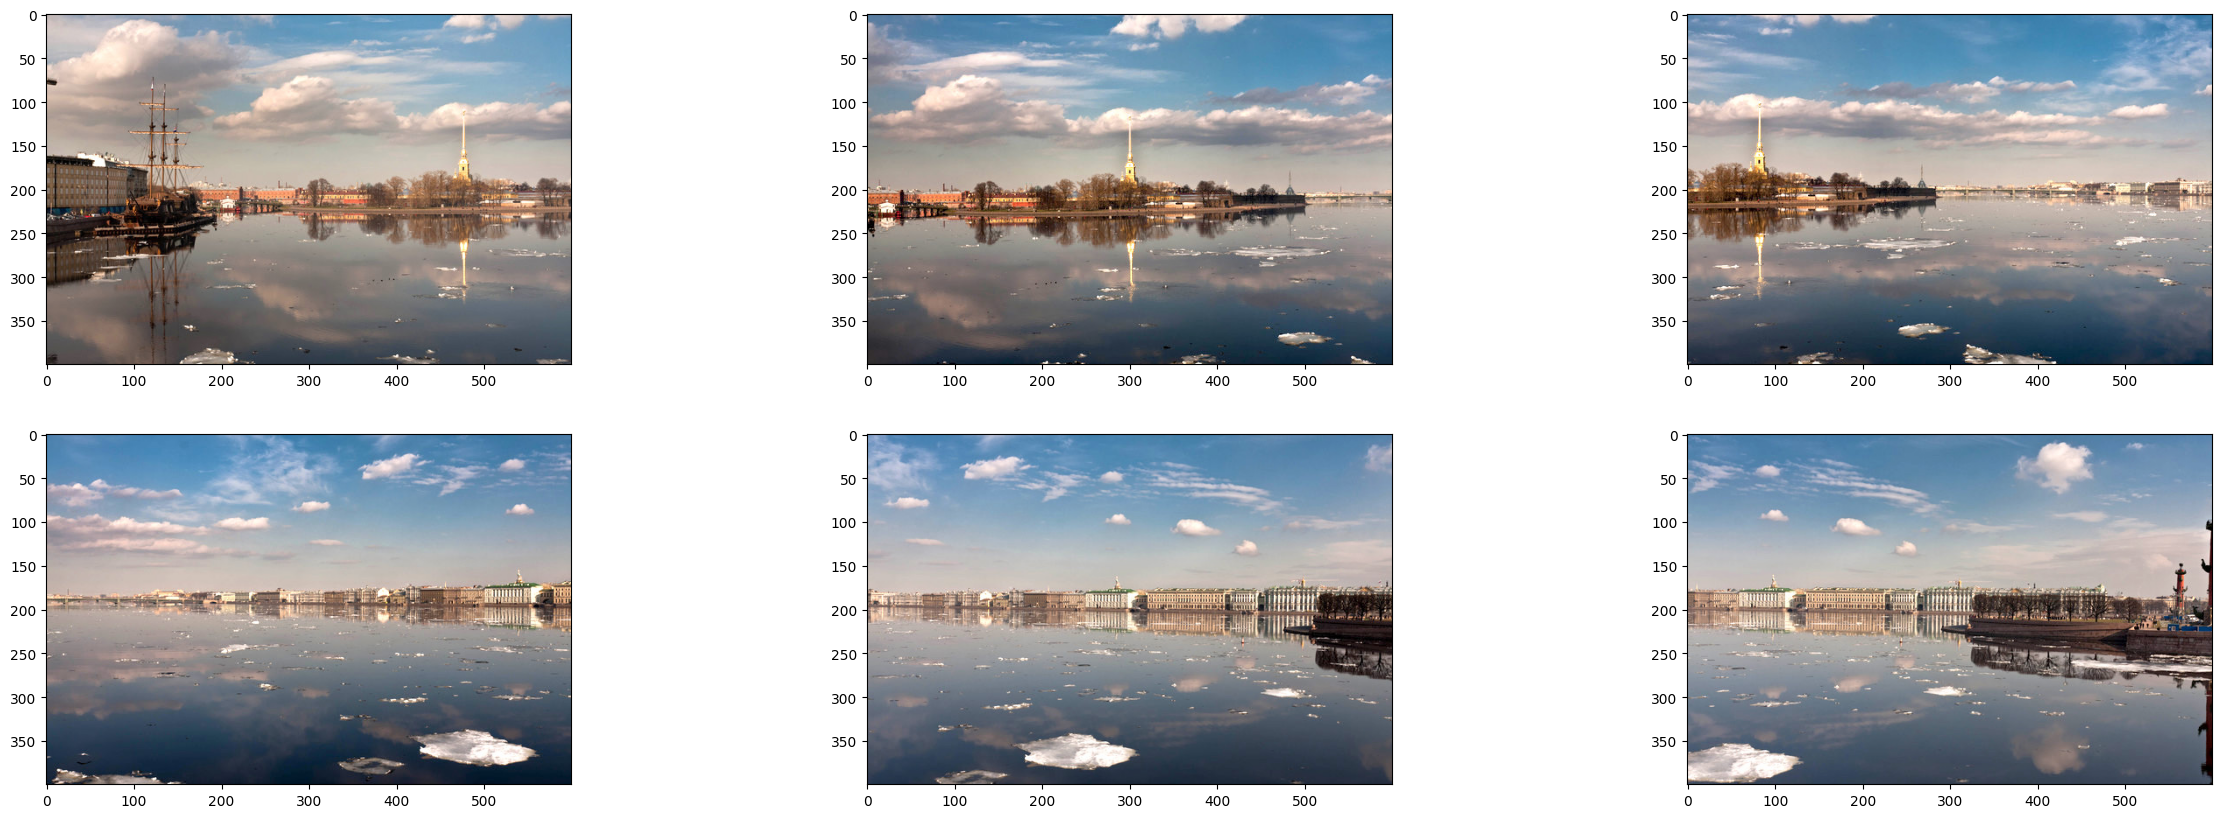

In [13]:
plt.figure(figsize=(30,10))
num_cols = 3
num_rows = math.ceil(len(images)//num_cols)
for i in range(len(images)):
  plt.subplot(num_rows, num_cols, i+1)
  plt.imshow(images[i][:, :, ::-1])


In [12]:
#sticher_create
sticher = cv2.Stitcher_create()

In [14]:
status, result = sticher.stitch(images)

In [15]:
status

0

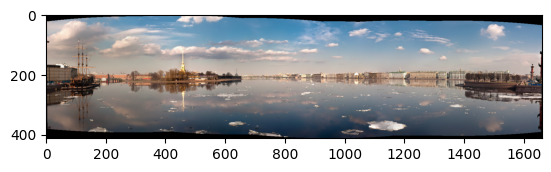

In [16]:
plt.imshow(result[:, :, ::-1])

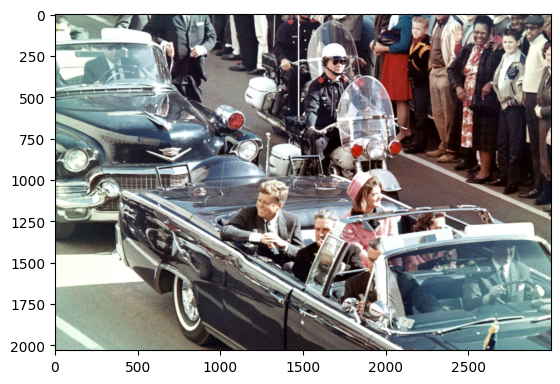

In [17]:
#HDR (high dynamic range)
#255
#0
original_img = cv2.imread("/content/drive/MyDrive/AbelFolder/jfk.jpg", cv2.IMREAD_COLOR)
plt.imshow(original_img[:, :, ::-1])

In [18]:
orginal_img_0_25 = cv2.normalize(original_img, None, 0, 255, cv2.NORM_MINMAX)

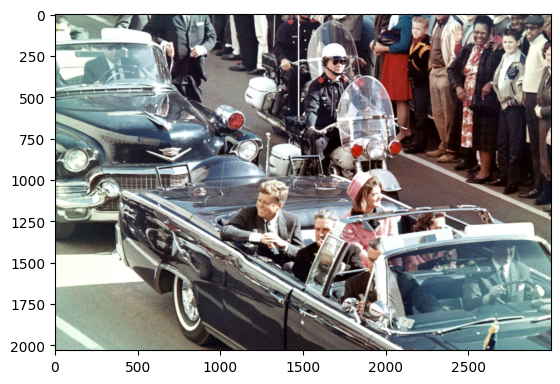

In [19]:
plt.imshow(orginal_img_0_25[:, :, ::-1])

AttributeError: 'numpy.ndarray' object has no attribute 'set'

In [72]:
#darker image
matrix_img_darker_150 = np.ones((original_img.shape), dtype="uint8")*150

In [73]:
org_img_darker_150 = cv2.subtract(original_img, matrix_img_darker_150)

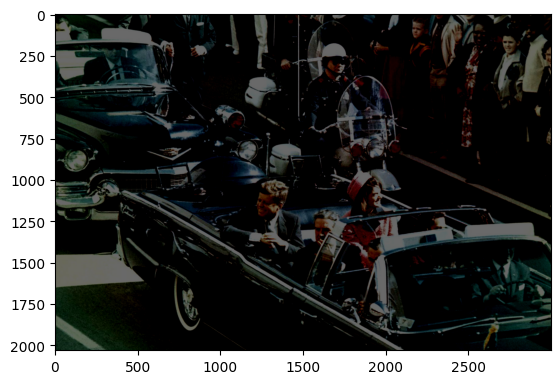

In [74]:
plt.imshow(org_img_darker_150[:, :, ::-1])

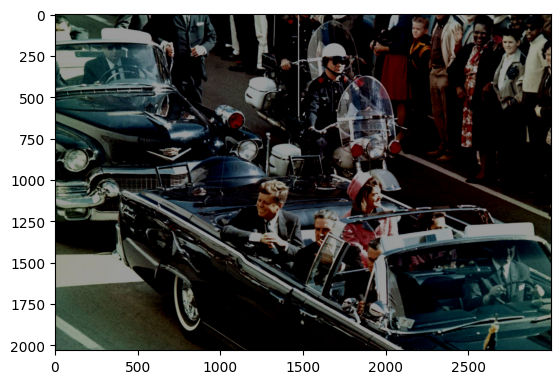

In [75]:
matrix_img_darker_100 = np.ones((original_img.shape), dtype="uint8")*100
org_img_darker_100 = cv2.subtract(original_img, matrix_img_darker_100)
plt.imshow(org_img_darker_100[:, :, ::-1])

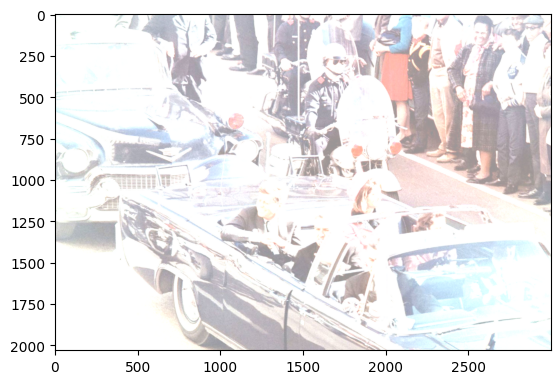

In [76]:
#brighter image add
org_img_bri_150 = cv2.add(original_img, matrix_img_darker_150)
plt.imshow(org_img_bri_150[:, :, ::-1])

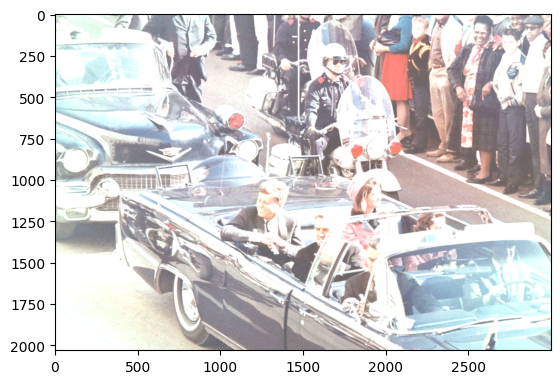

In [77]:
original_img_bri_100 = cv2.add(original_img, matrix_img_darker_100)
plt.imshow(original_img_bri_100[:, :, ::-1])

In [78]:
#aligning images
alignmtb = cv2.createAlignMTB()

In [79]:
alignmtb.process([org_img_darker_100, org_img_darker_150, original_img_bri_100, org_img_bri_150], [org_img_darker_100, org_img_darker_150, original_img_bri_100, org_img_bri_150])

In [80]:
#times argument
times = np.array([1/30.0, 0.25, 2.5, 15.0], dtype="float32")

In [81]:
times

array([ 0.03333334,  0.25      ,  2.5       , 15.        ], dtype=float32)

In [82]:
img_list = [org_img_darker_100, org_img_darker_150, original_img_bri_100, org_img_bri_150]

In [83]:
#camera responses function
calib = cv2.createCalibrateDebevec()
response = calib.process(img_list, times)

In [85]:
x = np.arange(256, dtype="uint8")

In [86]:
y = np.squeeze(response)

In [87]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [88]:
y

array([[3.77794415e-01, 1.98725790e-01, 1.47729188e-01],
       [7.63092995e-01, 2.52224743e-01, 2.97690839e-01],
       [1.37391913e+00, 3.04131359e-01, 5.63358724e-01],
       [2.23332620e+00, 3.49699825e-01, 1.00823295e+00],
       [3.33022761e+00, 3.84866029e-01, 1.72138548e+00],
       [4.61348677e+00, 4.23895806e-01, 2.82317305e+00],
       [5.99580812e+00, 4.74512696e-01, 4.38508940e+00],
       [7.36541319e+00, 5.43743253e-01, 6.41863108e+00],
       [8.60394192e+00, 6.39959931e-01, 8.84515095e+00],
       [9.60411167e+00, 7.70792842e-01, 1.13502455e+01],
       [1.02859774e+01, 9.47398901e-01, 1.36884880e+01],
       [1.08179846e+01, 1.18570495e+00, 1.56274567e+01],
       [1.13574677e+01, 1.49901009e+00, 1.71764565e+01],
       [1.16658392e+01, 1.90315771e+00, 1.85894814e+01],
       [1.17552700e+01, 2.39825344e+00, 2.03292351e+01],
       [1.16463451e+01, 2.94988561e+00, 2.21849766e+01],
       [1.13650742e+01, 3.49723434e+00, 2.39295425e+01],
       [1.09406366e+01, 4.06507

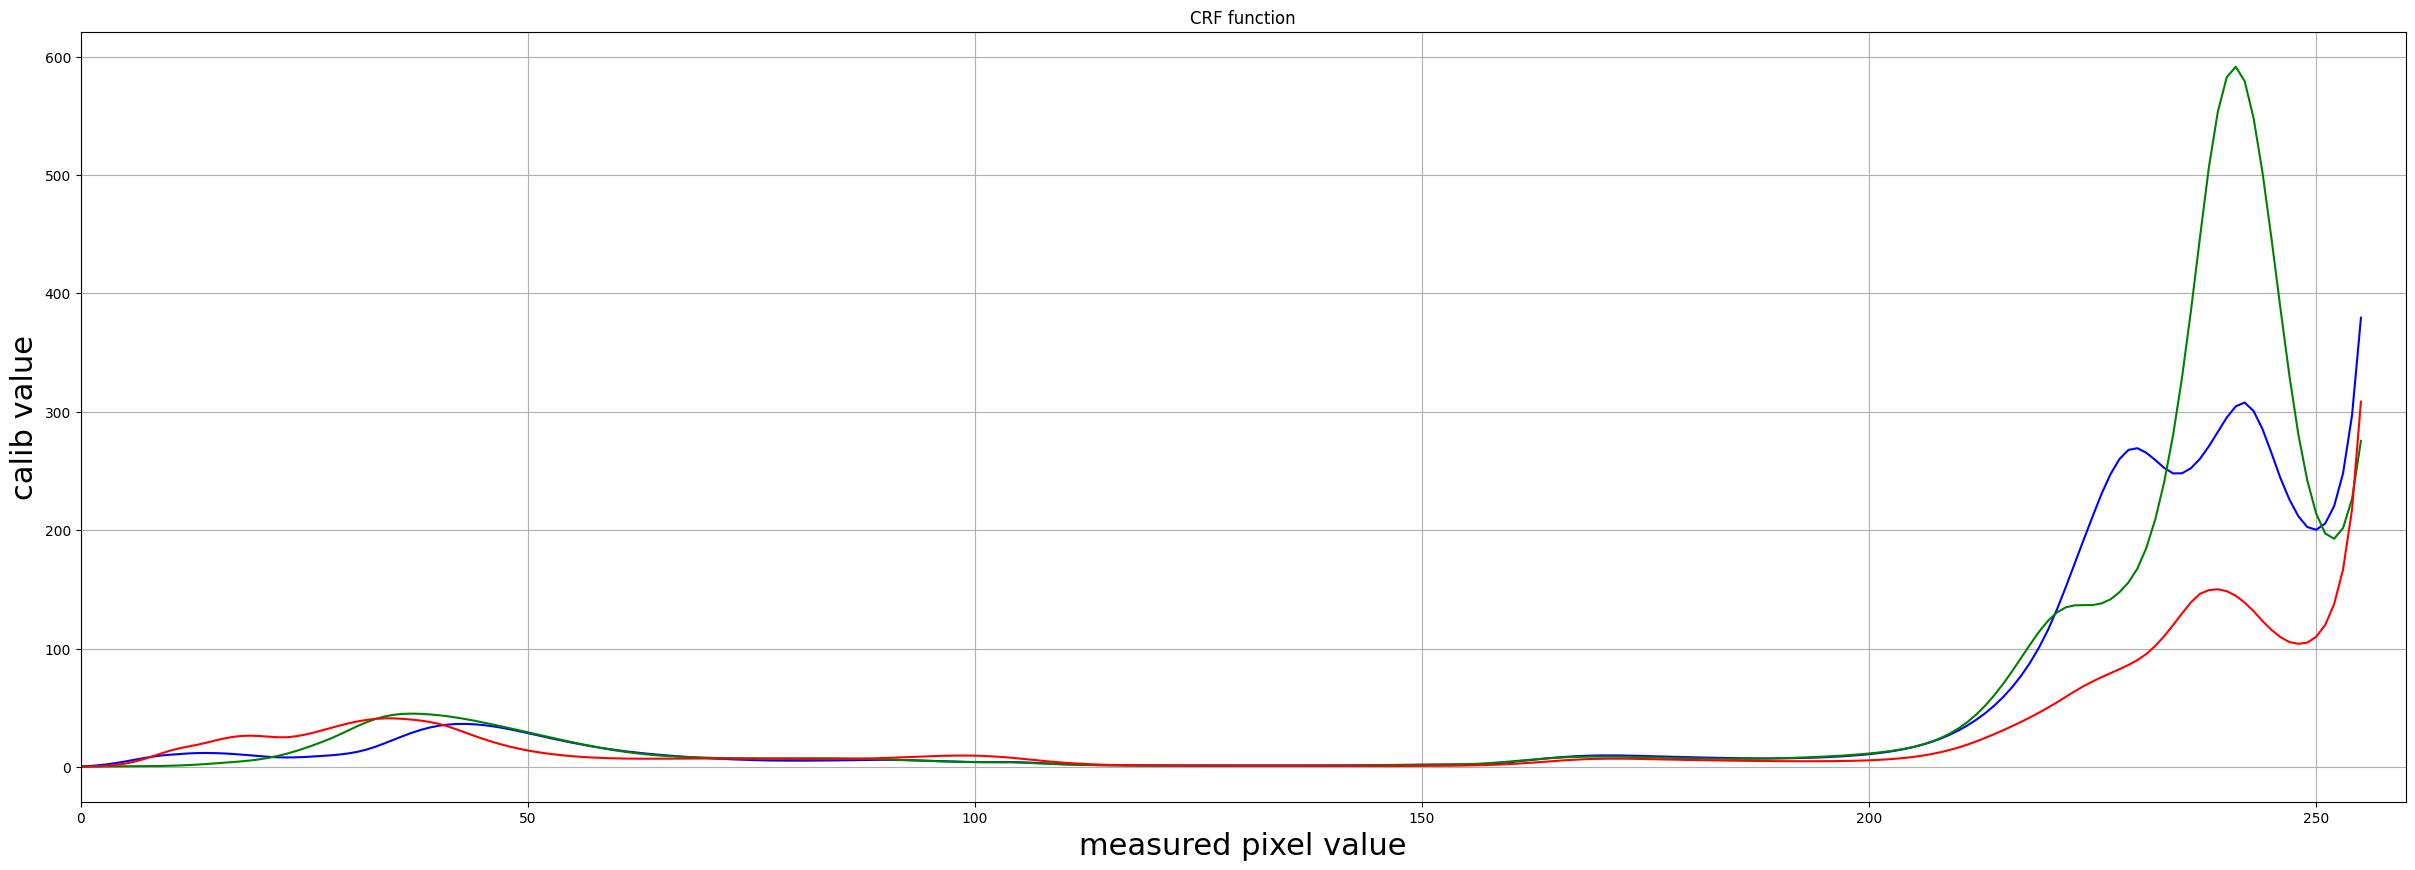

In [89]:
ax = plt.figure(figsize=[30, 10])
plt.title("CRF function")
plt.xlabel("measured pixel value", fontsize=22)
plt.ylabel("calib value", fontsize=22)
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:, 0], "b", x, y[:, 1], "g", x, y[:, 2], "r")

In [90]:
#merging
merge_result = cv2.createMergeDebevec()
hdr_result = merge_result.process(img_list, times, response)

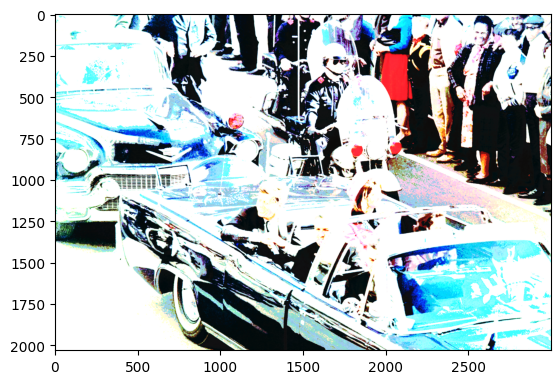

In [96]:
tonemap = cv2.createTonemapDrago(1.0, 0.7)
hdr_drago = tonemap.process(hdr_result)
hdr_drago = 10*hdr_drago
result = np.clip(hdr_drago, 0, 255)
plt.imshow(result[:, :, ::-1])